# Ciencia de Datos 2022
# <center> **Aula 21 -- Data Imputation**

# Introduction

In this tutorial we will explore some basic techniques of data imputation, that is, how to fill missing values in a dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer

In [2]:
pd.set_option('max_rows', 30)

In [3]:
data = pd.read_csv('hpi-data-2016.csv')

In [4]:
data.head(10)

,Country,Region,Average-Life-Expectancy,Average-Wellbeing_(0-10),Happy-Life-Years,Footprint_(gha/capita),Inequality-of-Outcomes,Inequality-adjusted-Life-Expectancy,Inequality-adjusted-Wellbeing,Happy-Planet-Index,GDP/capita($PPP),Population,GINI-index
0,Afghanistan,Middle East and North Africa,59.7,3.8,12.4,0.8,0.43,38.3,3.4,20.2,691,29726803,NaN
1,Albania,Post-communist,77.3,5.5,34.4,2.2,0.17,69.7,5.1,36.8,4247,2900489,29.0
2,Algeria,Middle East and North Africa,74.3,5.6,30.5,2.1,0.24,60.5,5.2,33.3,5584,37439427,NaN
3,Argentina,Americas,75.9,6.5,40.2,3.1,0.16,68.3,6.0,35.2,14357,42095224,42.5
4,Armenia,Post-communist,74.4,4.3,24.0,2.2,0.22,66.9,3.7,25.7,3566,2978339,30.5
5,Australia,Asia Pacific,82.1,7.2,53.1,9.3,0.08,78.6,6.9,21.2,67646,22728254,NaN
6,Austria,Europe,81.0,7.4,54.4,6.1,0.07,78.0,7.1,30.5,48324,8429991,30.5
7,Bangladesh,Asia Pacific,70.8,4.7,23.3,0.7,0.27,56.6,4.3,38.4,859,155257387,NaN
8,Belarus,Post-communist,70.9,5.7,34.0,5.1,0.13,66.7,5.3,21.7,6722,9464000,26.0
9,Belgium,Europe,80.4,6.9,49.5,7.4,0.09,77.2,6.6,23.7,44731,11128246,27.6


In [5]:
data.shape

(140, 13)

# Missing data

Entries missing values are given the value `NaN`, short for "Not a Number". For technical reasons these `NaN` values are always of the `float64` dtype.

Pandas provides some methods specific to missing data. To select `NaN` entries you can use `pd.isnull()` (or its companion `pd.notnull()`). This is meant to be used thusly:

In [6]:
data.isnull().sum()

Country                                 0
Region                                  0
Average-Life-Expectancy                 0
Average-Wellbeing_(0-10)                0
Happy-Life-Years                        0
Footprint_(gha/capita)                  0
Inequality-of-Outcomes                  0
Inequality-adjusted-Life-Expectancy     0
Inequality-adjusted-Wellbeing           0
Happy-Planet-Index                      0
GDP/capita($PPP)                        0
Population                              0
GINI-index                             75
dtype: int64

Replacing missing values is a common operation.  Pandas provides a really handy method for this problem: `fillna()`. `fillna()` provides a few different strategies for mitigating such data. For example, we can simply replace each `NaN` with an `"Unknown"`:

In [7]:
data['GINI-index'].fillna("Unknown", inplace=True)

In [8]:
data.head(15)

,Country,Region,Average-Life-Expectancy,Average-Wellbeing_(0-10),Happy-Life-Years,Footprint_(gha/capita),Inequality-of-Outcomes,Inequality-adjusted-Life-Expectancy,Inequality-adjusted-Wellbeing,Happy-Planet-Index,GDP/capita($PPP),Population,GINI-index
0,Afghanistan,Middle East and North Africa,59.7,3.8,12.4,0.8,0.43,38.3,3.4,20.2,691,29726803,Unknown
1,Albania,Post-communist,77.3,5.5,34.4,2.2,0.17,69.7,5.1,36.8,4247,2900489,29.0
2,Algeria,Middle East and North Africa,74.3,5.6,30.5,2.1,0.24,60.5,5.2,33.3,5584,37439427,Unknown
3,Argentina,Americas,75.9,6.5,40.2,3.1,0.16,68.3,6.0,35.2,14357,42095224,42.5
4,Armenia,Post-communist,74.4,4.3,24.0,2.2,0.22,66.9,3.7,25.7,3566,2978339,30.5
5,Australia,Asia Pacific,82.1,7.2,53.1,9.3,0.08,78.6,6.9,21.2,67646,22728254,Unknown
6,Austria,Europe,81.0,7.4,54.4,6.1,0.07,78.0,7.1,30.5,48324,8429991,30.5
7,Bangladesh,Asia Pacific,70.8,4.7,23.3,0.7,0.27,56.6,4.3,38.4,859,155257387,Unknown
8,Belarus,Post-communist,70.9,5.7,34.0,5.1,0.13,66.7,5.3,21.7,6722,9464000,26.0
9,Belgium,Europe,80.4,6.9,49.5,7.4,0.09,77.2,6.6,23.7,44731,11128246,27.6


## Fill with zeros

In [9]:
## reemplazar con 0
data = pd.read_csv('hpi-data-2016.csv')
data2 = data.copy()

In [10]:
data2['GINI-index'] = data2['GINI-index'].fillna(0)

In [11]:
data2.head()

,Country,Region,Average-Life-Expectancy,Average-Wellbeing_(0-10),Happy-Life-Years,Footprint_(gha/capita),Inequality-of-Outcomes,Inequality-adjusted-Life-Expectancy,Inequality-adjusted-Wellbeing,Happy-Planet-Index,GDP/capita($PPP),Population,GINI-index
0,Afghanistan,Middle East and North Africa,59.7,3.8,12.4,0.8,0.43,38.3,3.4,20.2,691,29726803,0.0
1,Albania,Post-communist,77.3,5.5,34.4,2.2,0.17,69.7,5.1,36.8,4247,2900489,29.0
2,Algeria,Middle East and North Africa,74.3,5.6,30.5,2.1,0.24,60.5,5.2,33.3,5584,37439427,0.0
3,Argentina,Americas,75.9,6.5,40.2,3.1,0.16,68.3,6.0,35.2,14357,42095224,42.5
4,Armenia,Post-communist,74.4,4.3,24.0,2.2,0.22,66.9,3.7,25.7,3566,2978339,30.5


In [12]:
data['GINI-index'].mean()

36.52

In [13]:
data2['GINI-index'].mean()

16.955714285714286

<AxesSubplot:>

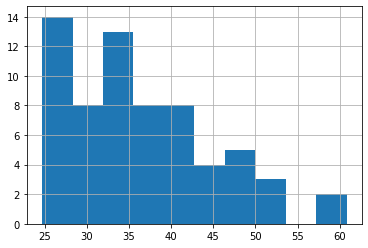

In [14]:
data['GINI-index'].hist()

<AxesSubplot:>

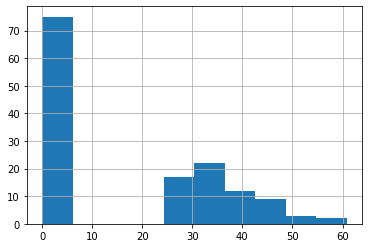

In [15]:
data2['GINI-index'].hist()

## Fill with statistical resumes

In [16]:
## reemplazar con la media

data3 = data.copy()
media = data3['GINI-index'].mean()
print(media)

36.52


In [17]:
data3['GINI-index'] = data3['GINI-index'].fillna(media)

In [18]:
data3.head()

,Country,Region,Average-Life-Expectancy,Average-Wellbeing_(0-10),Happy-Life-Years,Footprint_(gha/capita),Inequality-of-Outcomes,Inequality-adjusted-Life-Expectancy,Inequality-adjusted-Wellbeing,Happy-Planet-Index,GDP/capita($PPP),Population,GINI-index
0,Afghanistan,Middle East and North Africa,59.7,3.8,12.4,0.8,0.43,38.3,3.4,20.2,691,29726803,36.52
1,Albania,Post-communist,77.3,5.5,34.4,2.2,0.17,69.7,5.1,36.8,4247,2900489,29.00
2,Algeria,Middle East and North Africa,74.3,5.6,30.5,2.1,0.24,60.5,5.2,33.3,5584,37439427,36.52
3,Argentina,Americas,75.9,6.5,40.2,3.1,0.16,68.3,6.0,35.2,14357,42095224,42.50
4,Armenia,Post-communist,74.4,4.3,24.0,2.2,0.22,66.9,3.7,25.7,3566,2978339,30.50


In [19]:
data3['GINI-index'].mean()

36.520000000000046

<AxesSubplot:>

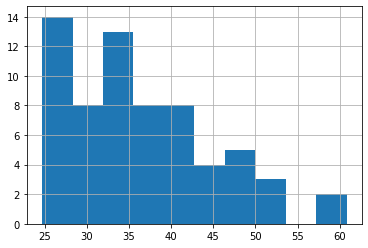

In [20]:
data['GINI-index'].hist()      # pandas histogram descarta los faltantes

<AxesSubplot:>

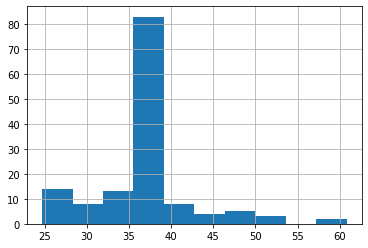

In [21]:
data3['GINI-index'].hist()

In [22]:
# reemplazar con la mediana

mediana = data['GINI-index'].median()
print(mediana)
data3['GINI-index'] = data3['GINI-index'].fillna(mediana)

35.2


In [23]:
moda = data['Region'].mode()
print(moda)

0    Sub Saharan Africa
dtype: object


In [24]:
moda = data['GINI-index'].mode()
print(moda)

0    26.1
1    27.3
2    27.4
3    30.5
4    35.2
5    36.0
6    38.7
7    45.1
dtype: float64


In [25]:
data['GINI-index'].value_counts()

36.0    2
26.1    2
30.5    2
38.7    2
27.4    2
       ..
39.3    1
51.9    1
35.9    1
33.1    1
24.7    1
Name: GINI-index, Length: 57, dtype: int64

## Fill with group or cluster mean 

Sometimes it is more convenient to replace missing values with group means, where the groups correspond to some categorial variable values, or some clustering scheme.

In [26]:
regions = data.Region.unique()
regions

array(['Middle East and North Africa', 'Post-communist', 'Americas',
       'Asia Pacific', 'Europe', 'Sub Saharan Africa'], dtype=object)

In [27]:
data.groupby('Region')['GINI-index'].mean()
#means = data.groupby('Region')['GINI-index'].mean().values
#means

Region
Americas                        48.726667
Asia Pacific                    37.557143
Europe                          31.394444
Middle East and North Africa    34.850000
Post-communist                  30.957895
Sub Saharan Africa              39.250000
Name: GINI-index, dtype: float64

In [28]:
means = data.groupby('Region')['GINI-index'].mean().values
means

array([48.72666667, 37.55714286, 31.39444444, 34.85      , 30.95789474,
       39.25      ])

In [29]:
data4 = data.copy()
data4['GINI-index'] = data4['GINI-index'].fillna(data3.groupby('Region')['GINI-index'].transform('mean'))
data4

,Country,Region,Average-Life-Expectancy,Average-Wellbeing_(0-10),Happy-Life-Years,Footprint_(gha/capita),Inequality-of-Outcomes,Inequality-adjusted-Life-Expectancy,Inequality-adjusted-Wellbeing,Happy-Planet-Index,GDP/capita($PPP),Population,GINI-index
0,Afghanistan,Middle East and North Africa,59.7,3.8,12.4,0.8,0.43,38.3,3.4,20.2,691,29726803,36.281429
1,Albania,Post-communist,77.3,5.5,34.4,2.2,0.17,69.7,5.1,36.8,4247,2900489,29.000000
2,Algeria,Middle East and North Africa,74.3,5.6,30.5,2.1,0.24,60.5,5.2,33.3,5584,37439427,36.281429
3,Argentina,Americas,75.9,6.5,40.2,3.1,0.16,68.3,6.0,35.2,14357,42095224,42.500000
4,Armenia,Post-communist,74.4,4.3,24.0,2.2,0.22,66.9,3.7,25.7,3566,2978339,30.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Venezuela,Americas,73.9,7.1,41.5,3.6,0.19,65.5,6.5,33.6,12772,29854238,43.844000
136,Vietnam,Asia Pacific,75.5,5.5,32.8,1.7,0.19,64.8,5.2,40.3,1755,88809200,38.700000
137,Yemen,Middle East and North Africa,63.3,4.1,15.2,1.0,0.39,44.7,3.6,22.8,1289,24882792,36.281429
138,Zambia,Sub Saharan Africa,58.4,5.0,16.7,1.0,0.41,38.7,4.5,25.2,1687,14786581,36.841176


<AxesSubplot:>

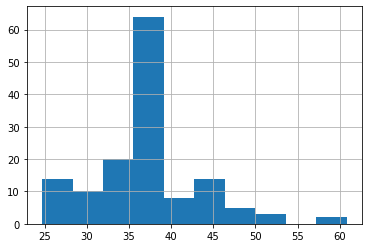

In [30]:
data4['GINI-index'].hist()

## Fill with linear regression estimations

In [31]:
data.corr()

,Average-Life-Expectancy,Average-Wellbeing_(0-10),Happy-Life-Years,Footprint_(gha/capita),Inequality-of-Outcomes,Inequality-adjusted-Life-Expectancy,Inequality-adjusted-Wellbeing,Happy-Planet-Index,GDP/capita($PPP),Population,GINI-index
Average-Life-Expectancy,1.000000,0.684597,0.874994,0.621546,-0.933635,0.982560,0.670472,0.540539,0.620792,0.013189,-0.329860
Average-Wellbeing_(0-10),0.684597,1.000000,0.929916,0.669626,-0.756944,0.696176,0.994429,0.509647,0.710701,-0.023479,-0.158217
Happy-Life-Years,0.874994,0.929916,1.000000,0.748900,-0.919483,0.889390,0.930779,0.499604,0.796483,-0.027091,-0.357976
Footprint_(gha/capita),0.621546,0.669626,0.748900,1.000000,-0.717209,0.668154,0.681618,-0.130605,0.796346,-0.056481,-0.424435
Inequality-of-Outcomes,-0.933635,-0.756944,-0.919483,-0.717209,1.000000,-0.971618,-0.757822,-0.464021,-0.668670,0.001681,0.579074
Inequality-adjusted-Life-Expectancy,0.982560,0.696176,0.889390,0.668154,-0.971618,1.000000,0.682141,0.487741,0.642361,-0.001109,-0.470139
Inequality-adjusted-Wellbeing,0.670472,0.994429,0.930779,0.681618,-0.757822,0.682141,1.000000,0.486368,0.730921,-0.023779,-0.211804
Happy-Planet-Index,0.540539,0.509647,0.499604,-0.130605,-0.464021,0.487741,0.486368,1.000000,0.114016,0.066213,0.245163
GDP/capita($PPP),0.620792,0.710701,0.796483,0.796346,-0.668670,0.642361,0.730921,0.114016,1.000000,-0.051025,-0.401849
Population,0.013189,-0.023479,-0.027091,-0.056481,0.001681,-0.001109,-0.023779,0.066213,-0.051025,1.000000,0.301755


<Figure size 432x288 with 0 Axes>

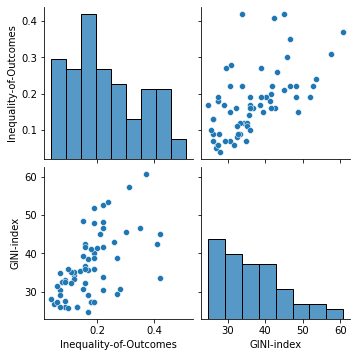

In [32]:
plt.figure()
sns.pairplot(data[['Inequality-of-Outcomes', 'GINI-index']])
plt.show()

In [33]:
datadropna = data.dropna()

In [34]:
datadropna

,Country,Region,Average-Life-Expectancy,Average-Wellbeing_(0-10),Happy-Life-Years,Footprint_(gha/capita),Inequality-of-Outcomes,Inequality-adjusted-Life-Expectancy,Inequality-adjusted-Wellbeing,Happy-Planet-Index,GDP/capita($PPP),Population,GINI-index
1,Albania,Post-communist,77.3,5.5,34.4,2.2,0.17,69.7,5.1,36.8,4247,2900489,29.0
3,Argentina,Americas,75.9,6.5,40.2,3.1,0.16,68.3,6.0,35.2,14357,42095224,42.5
4,Armenia,Post-communist,74.4,4.3,24.0,2.2,0.22,66.9,3.7,25.7,3566,2978339,30.5
6,Austria,Europe,81.0,7.4,54.4,6.1,0.07,78.0,7.1,30.5,48324,8429991,30.5
8,Belarus,Post-communist,70.9,5.7,34.0,5.1,0.13,66.7,5.3,21.7,6722,9464000,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,Uganda,Sub Saharan Africa,57.1,4.3,13.8,1.2,0.41,36.8,3.9,19.4,656,35400620,42.4
129,Ukraine,Post-communist,70.3,5.0,28.3,2.8,0.17,64.2,4.6,26.4,3855,45593300,24.7
130,United Kingdom,Europe,80.4,6.9,49.1,4.9,0.09,76.8,6.6,31.9,41295,63700300,32.6
132,Uruguay,Americas,76.9,6.4,39.4,2.9,0.18,69.6,5.8,36.1,15128,3396753,41.3


In [35]:
x = datadropna['Inequality-of-Outcomes'].values
y = datadropna['GINI-index'].values

In [36]:
x

array([0.17, 0.16, 0.22, 0.07, 0.13, 0.09, 0.27, 0.35, 0.22, 0.19, 0.28,
       0.24, 0.15, 0.12, 0.09, 0.07, 0.42, 0.3 , 0.22, 0.22, 0.12, 0.06,
       0.09, 0.2 , 0.16, 0.42, 0.37, 0.31, 0.15, 0.05, 0.27, 0.08, 0.12,
       0.18, 0.18, 0.14, 0.11, 0.07, 0.17, 0.19, 0.22, 0.16, 0.04, 0.07,
       0.19, 0.22, 0.21, 0.26, 0.11, 0.16, 0.19, 0.16, 0.13, 0.1 , 0.1 ,
       0.17, 0.06, 0.06, 0.15, 0.19, 0.41, 0.17, 0.09, 0.18, 0.19])

In [37]:
y

array([29. , 42.5, 30.5, 30.5, 26. , 27.6, 38.7, 46.7, 52.7, 36. , 30.8,
       53.5, 48.6, 34.3, 26.1, 29.1, 45.1, 45.7, 46.6, 41.8, 33.2, 27.1,
       33.1, 41.4, 36.7, 33.7, 60.8, 57.4, 30.6, 26.9, 29.5, 32.5, 35.2,
       27.4, 27.4, 35.5, 35.2, 34.8, 35.8, 48.1, 33.8, 32.2, 28. , 25.9,
       51.9, 48.2, 45.1, 43. , 32.4, 36. , 27.3, 41.6, 26.1, 25.6, 35.9,
       38.6, 27.3, 31.6, 39.3, 40.2, 42.4, 24.7, 32.6, 41.3, 38.7])

In [38]:
x.shape

(65,)

In [39]:
n = x.shape[0]
n

65

In [40]:
# construct design matrix

X = np.stack([np.ones(n), x]).T
X.shape

(65, 2)

In [41]:
# compute linear regression coefficients

c = np.linalg.inv(X.T @ X) @ (X.T) @ y

In [42]:
c

array([26.88757292, 54.87359863])

In [43]:
def regresion(x, c):
    yhat = c @ np.hstack([np.array([1.]), x])
    return yhat

In [44]:
data4 = data.copy()

In [45]:
data4

,Country,Region,Average-Life-Expectancy,Average-Wellbeing_(0-10),Happy-Life-Years,Footprint_(gha/capita),Inequality-of-Outcomes,Inequality-adjusted-Life-Expectancy,Inequality-adjusted-Wellbeing,Happy-Planet-Index,GDP/capita($PPP),Population,GINI-index
0,Afghanistan,Middle East and North Africa,59.7,3.8,12.4,0.8,0.43,38.3,3.4,20.2,691,29726803,NaN
1,Albania,Post-communist,77.3,5.5,34.4,2.2,0.17,69.7,5.1,36.8,4247,2900489,29.0
2,Algeria,Middle East and North Africa,74.3,5.6,30.5,2.1,0.24,60.5,5.2,33.3,5584,37439427,NaN
3,Argentina,Americas,75.9,6.5,40.2,3.1,0.16,68.3,6.0,35.2,14357,42095224,42.5
4,Armenia,Post-communist,74.4,4.3,24.0,2.2,0.22,66.9,3.7,25.7,3566,2978339,30.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Venezuela,Americas,73.9,7.1,41.5,3.6,0.19,65.5,6.5,33.6,12772,29854238,NaN
136,Vietnam,Asia Pacific,75.5,5.5,32.8,1.7,0.19,64.8,5.2,40.3,1755,88809200,38.7
137,Yemen,Middle East and North Africa,63.3,4.1,15.2,1.0,0.39,44.7,3.6,22.8,1289,24882792,NaN
138,Zambia,Sub Saharan Africa,58.4,5.0,16.7,1.0,0.41,38.7,4.5,25.2,1687,14786581,NaN


In [46]:
for i in range(0, data4.shape[0]):
    if np.isnan(data4['GINI-index'][i]):
        y = regresion(data4['Inequality-of-Outcomes'][i], c)
        data4['GINI-index'][i] = y

<ipython-input-46-d157c143b717>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['GINI-index'][i] = y


In [47]:
data4

,Country,Region,Average-Life-Expectancy,Average-Wellbeing_(0-10),Happy-Life-Years,Footprint_(gha/capita),Inequality-of-Outcomes,Inequality-adjusted-Life-Expectancy,Inequality-adjusted-Wellbeing,Happy-Planet-Index,GDP/capita($PPP),Population,GINI-index
0,Afghanistan,Middle East and North Africa,59.7,3.8,12.4,0.8,0.43,38.3,3.4,20.2,691,29726803,50.483220
1,Albania,Post-communist,77.3,5.5,34.4,2.2,0.17,69.7,5.1,36.8,4247,2900489,29.000000
2,Algeria,Middle East and North Africa,74.3,5.6,30.5,2.1,0.24,60.5,5.2,33.3,5584,37439427,40.057237
3,Argentina,Americas,75.9,6.5,40.2,3.1,0.16,68.3,6.0,35.2,14357,42095224,42.500000
4,Armenia,Post-communist,74.4,4.3,24.0,2.2,0.22,66.9,3.7,25.7,3566,2978339,30.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Venezuela,Americas,73.9,7.1,41.5,3.6,0.19,65.5,6.5,33.6,12772,29854238,37.313557
136,Vietnam,Asia Pacific,75.5,5.5,32.8,1.7,0.19,64.8,5.2,40.3,1755,88809200,38.700000
137,Yemen,Middle East and North Africa,63.3,4.1,15.2,1.0,0.39,44.7,3.6,22.8,1289,24882792,48.288276
138,Zambia,Sub Saharan Africa,58.4,5.0,16.7,1.0,0.41,38.7,4.5,25.2,1687,14786581,49.385748


<AxesSubplot:>

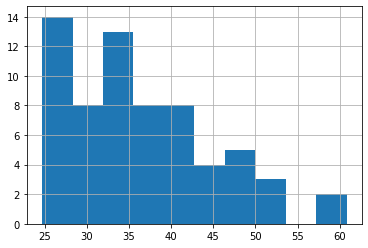

In [48]:
data['GINI-index'].hist()

<AxesSubplot:>

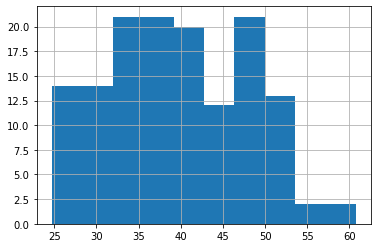

In [49]:
data4['GINI-index'].hist()

## K nearest neighbour imputation

In [50]:
from sklearn.impute import KNNImputer

In [51]:
# define imputer
imputer = KNNImputer(n_neighbors=10, weights='uniform', metric='nan_euclidean')

In [52]:
X = data.iloc[:,2:].values

# fit
imputer.fit(X)

KNNImputer(n_neighbors=10)

In [53]:
# transform the dataset
Xtrans = imputer.transform(X)

In [54]:
data4 = data.copy()
data4['GINI-index'] = imputer.transform(X)[:,-1]

In [55]:
data4

,Country,Region,Average-Life-Expectancy,Average-Wellbeing_(0-10),Happy-Life-Years,Footprint_(gha/capita),Inequality-of-Outcomes,Inequality-adjusted-Life-Expectancy,Inequality-adjusted-Wellbeing,Happy-Planet-Index,GDP/capita($PPP),Population,GINI-index
0,Afghanistan,Middle East and North Africa,59.7,3.8,12.4,0.8,0.43,38.3,3.4,20.2,691,29726803,35.98
1,Albania,Post-communist,77.3,5.5,34.4,2.2,0.17,69.7,5.1,36.8,4247,2900489,29.00
2,Algeria,Middle East and North Africa,74.3,5.6,30.5,2.1,0.24,60.5,5.2,33.3,5584,37439427,37.19
3,Argentina,Americas,75.9,6.5,40.2,3.1,0.16,68.3,6.0,35.2,14357,42095224,42.50
4,Armenia,Post-communist,74.4,4.3,24.0,2.2,0.22,66.9,3.7,25.7,3566,2978339,30.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Venezuela,Americas,73.9,7.1,41.5,3.6,0.19,65.5,6.5,33.6,12772,29854238,35.98
136,Vietnam,Asia Pacific,75.5,5.5,32.8,1.7,0.19,64.8,5.2,40.3,1755,88809200,38.70
137,Yemen,Middle East and North Africa,63.3,4.1,15.2,1.0,0.39,44.7,3.6,22.8,1289,24882792,34.81
138,Zambia,Sub Saharan Africa,58.4,5.0,16.7,1.0,0.41,38.7,4.5,25.2,1687,14786581,35.37


<AxesSubplot:>

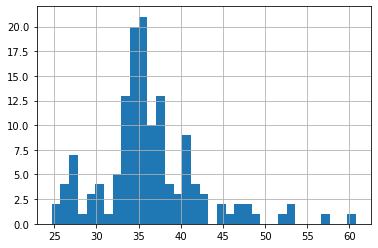

In [56]:
data4['GINI-index'].hist(bins=35)

<AxesSubplot:>

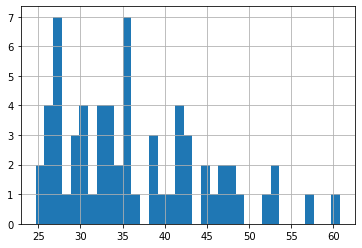

In [57]:
data['GINI-index'].hist(bins=35)